===========================광고요약===================================
키워드 : 워치4투명스트랩
검색량 : 110
클릭수 : 1.8
클릭률 : 0.016
===========================쇼핑검색===================================
상품수 : 12221
키워드 경쟁률 : 111.1
상품중앙값 : 9850.0
Top 10 상품중앙값 : 14900.0
===========================데이터시각화=================================


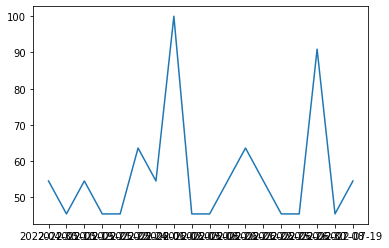

In [5]:
import requests
import time
import  hmac
import  hashlib
import  base64
import  pandas as pd

import urllib.request
import json
from pandas.io.json import json_normalize
import hashlib
import hmac
import base64
import os
import sys
import urllib.request
import json
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
%matplotlib inline


keywords = ['워치4투명스트랩'] #키워드검색

for keyword in keywords :
    
    ########################################## 네이버 광고 ######################################################
    
    BASE_URL = 'https://api.naver.com'
    API_KEY = ''  #api 키
    SECRET_KEY = '' #api 시크릿키
    CUSTOMER_ID = '' #customer ID 키 입력
    def generate(timestamp, method, uri, secret_key):
        message = "{}.{}.{}".format(timestamp, method, uri)
        #hash = hmac.new(bytes(secret_key, "utf-8"), bytes(message, "utf-8"), hashlib.sha256)
        hash = hmac.new(secret_key.encode("utf-8"), message.encode("utf-8"), hashlib.sha256)
        hash.hexdigest()
        return base64.b64encode(hash.digest())
    def get_header(method, uri, api_key, secret_key, customer_id):
        timestamp = str(int(time.time() * 1000))
        signature = generate(timestamp, method, uri, SECRET_KEY)
        return {'Content-Type': 'application/json; charset=UTF-8', 'X-Timestamp': timestamp, 'X-API-KEY': API_KEY, 'X-Customer': str(CUSTOMER_ID), 'X-Signature': signature}

    dic_return_kwd = {}
    naver_ad_url = '/keywordstool'
    #_kwds_string = '원피스' #1개일경우
    #_kwds_string = ['나이키', '원피스', '운동화'] #키워드 여러개일경우
    method = 'GET'
    prm = {'hintKeywords' : keyword , 'showDetail':1}
    #    ManageCustomerLink Usage Sample
    r = requests.get(BASE_URL + naver_ad_url, params=prm, headers=get_header(method, naver_ad_url, API_KEY, SECRET_KEY, CUSTOMER_ID))

    r_data = r.json()
    naver_ad_summary = pd.DataFrame(r_data['keywordList'])  
    naver_ad_summary['monthlyPcQcCnt'] = naver_ad_summary['monthlyPcQcCnt'].replace("< 10", "10") #필터링
    naver_ad_summary['monthlyMobileQcCnt'] = naver_ad_summary['monthlyMobileQcCnt'].replace("< 10", "10") #필터링
    naver_ad_summary['search_volumnes'] = naver_ad_summary['monthlyPcQcCnt'] + naver_ad_summary['monthlyMobileQcCnt'] #검색량

    
    
    #search_volumnes = r_data['keywordList'][0]['monthlyPcQcCnt'] + r_data['keywordList'][0]['monthlyMobileQcCnt']  #검색량
    search_volumnes = naver_ad_summary['search_volumnes'][0] #검색량
    
    search_clicks = r_data['keywordList'][0]['monthlyAvePcClkCnt'] + r_data['keywordList'][0]['monthlyAveMobileClkCnt'] #클릭수
    
    try :
        search_ctr = round((search_clicks / search_volumnes) * 1.0, 3)  #소수점 3자리까지
    except :
        search_ctr = '0%'
    #search_ctr_2 = "{0:.1%}".format(search_ctr)  #포멧형식  (퍼센티지 형식)

    
    
    ########################################## 네이버 쇼핑 검색 ######################################################

    client_id = "" #클라이언트 ID
    client_secret = "" #클라이언트 시크릿
    encText = urllib.parse.quote(keyword) 

    shop_url = "https://openapi.naver.com/v1/search/shop?query=" + encText + "&display=100&start=1" #100순위
    request = urllib.request.Request(shop_url) 

    request.add_header("X-Naver-Client-Id",client_id)
    request.add_header("X-Naver-Client-Secret",client_secret)
    response = urllib.request.urlopen(request)
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        json_str = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    json_object  = json.loads(json_str) #json 변환

    product_num = json_object['total'] #상품수 

    product_rawdata = pd.DataFrame(json_object['items'])
    product_rawdata['price'] = product_rawdata['lprice'] + product_rawdata['hprice']  #가격 통합
    #product_rawdata[['price', 'lprice', 'hprice']]  #확인완료

    product_rawdata = product_rawdata.astype({'price' : 'int'}) #정수로 타입 변경
    product_rawdata = product_rawdata.astype({'lprice' : 'int'}) #정수로 타입 변경
    #product_rawdata = product_rawdata.astype({'hprice' : 'int'}) #정수로 타입 변경


    #print(product_rawdata['price'].sum()) #확인 완료
    #rint(product_rawdata['lprice'].sum())
    #print(product_rawdata['hprice'].sum())

    product_rawdata['top10_price_median'] = product_rawdata[:10]['price'].median()  # Top 10 중앙값
    product_rawdata['top10_price_avg'] = product_rawdata[:10]['price'].mean()  # Top 10 평균가격

    product_rawdata['price_median'] = product_rawdata['price'].median()  # 전체 중앙값
    product_rawdata['price_avg'] = product_rawdata['price'].mean()  # 전체 평균가격

    #product_rawdata
    
    print("===========================광고요약===================================")
    print("키워드 : " + str(keyword))
    print("검색량 : " + str(search_volumnes)) #소수점 세자리, 반올림
    print("클릭수 : " + str(search_clicks)) #소수점 세자리, 반올림
    print("클릭률 : " + str(search_ctr))

    print("===========================쇼핑검색===================================")
    print("상품수 : " + str(product_num))
    try :
        print("키워드 경쟁률 : " + str(round(( product_num / search_volumnes ), 2)))
    except :
        print("키워드 경쟁률 : 0 % " )
    print("상품중앙값 : " + str(product_rawdata['top10_price_median'][0]))    #소수점 세자리, 반올림
    print("Top 10 상품중앙값 : " + str(product_rawdata['price_median'][0]))    #소수점 세자리, 반올림
    
    #time.sleep(3) #3초
    
    
    ########################################## 네이버 쇼핑 검색 트렌드(최근 90일 기준 트렌드) ############################################### 
    
    client_id = ""
    client_secret = ""

    #문자열로 날짜 변환
    dt_datetime = datetime.now()
    format = '%Y-%m-%d'
    today_date = datetime.strftime(dt_datetime,format) #오늘날짜
    date_90_prev = dt_datetime - timedelta(days=90)
    date_90_prev_date = datetime.strftime(date_90_prev,format) #90일전 날짜
    
    
    startDate = date_90_prev_date #시작날짜
    endDate =  today_date #끝날짜
    
    timeUnit = 'date'  #주기 week, month
    groupName = str(keyword)

    keyword1 = str(keyword)

    url = "https://naveropenapi.apigw.ntruss.com/datalab/v1/search"
    body = "{\"startDate\":\""+str(startDate)+"\",\"endDate\":\""+str(endDate)+"\",\"timeUnit\":\""+str(timeUnit)+"\",\"keywordGroups\":[{\"groupName\":\""+str(groupName)+"\",\"keywords\":[\""+str(keyword1)+"\"]}]}"

    request = urllib.request.Request(url)
    request.add_header("X-NCP-APIGW-API-KEY-ID",client_id)
    request.add_header("X-NCP-APIGW-API-KEY",client_secret)
    request.add_header("Content-Type","application/json")
    response = urllib.request.urlopen(request, data=body.encode("utf-8"))
    rescode = response.getcode()
    if(rescode==200):
        response_body = response.read()
        #print(response_body.decode('utf-8'))
        json_str = response_body.decode('utf-8')
    else:
        print("Error Code:" + rescode)

    json_object = json.loads(json_str)  #json 파일화

    daily_data = pd.DataFrame(json_object['results'][0]['data'])  #데이타
    
    try :
        print("===========================데이터시각화=================================")
        summary  = daily_data.groupby(['period']).max()[['ratio']]    #일자별 정렬
        plt.plot(list(summary.index), summary['ratio'], label='ratio') #그래프
    except :
        print("===========================데이터시각화=================================")
        print("데이터를 시각화로 표시할 수 없습니다.")
    
    time.sleep(3) #3초